In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\PC\Desktop\Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

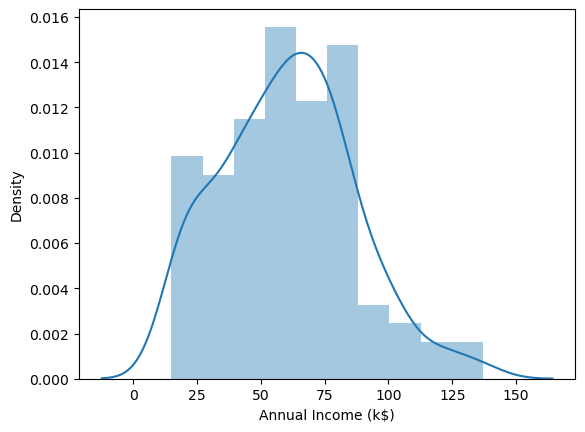

In [6]:
sns.distplot(df["Annual Income (k$)"])

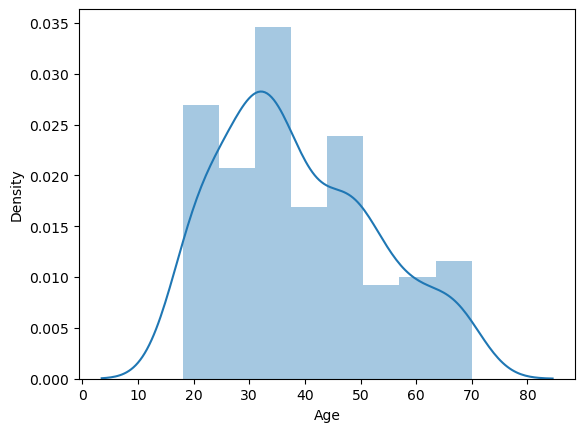

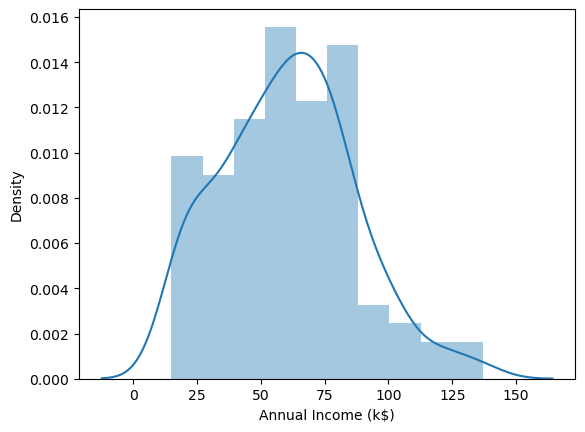

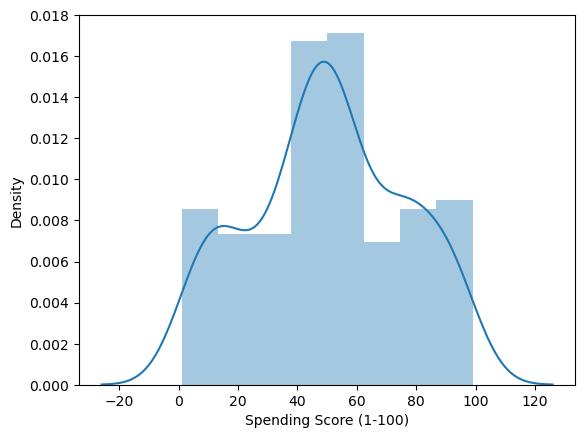

In [7]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

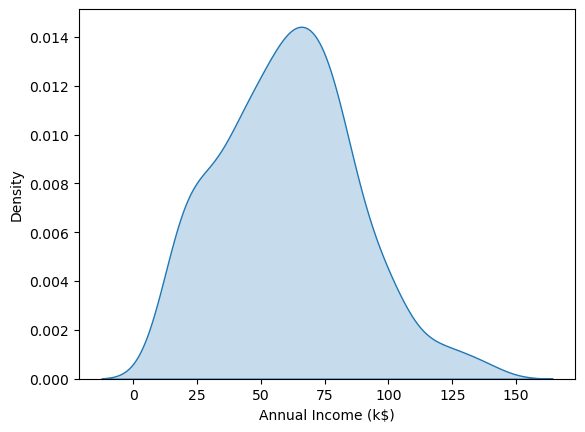

In [8]:
sns.kdeplot(df["Annual Income (k$)"], shade = True);

In [9]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

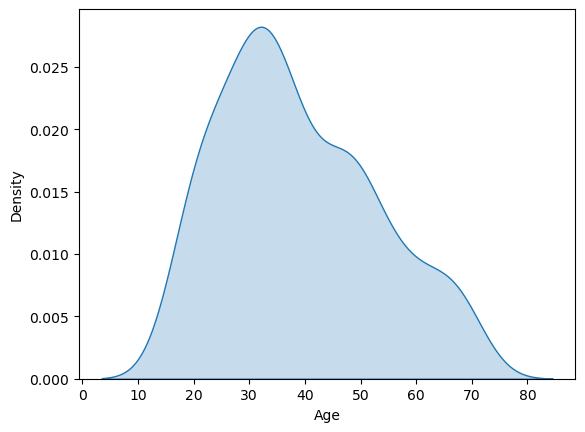

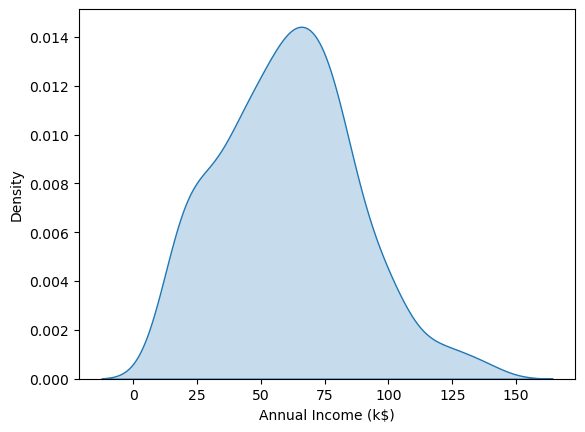

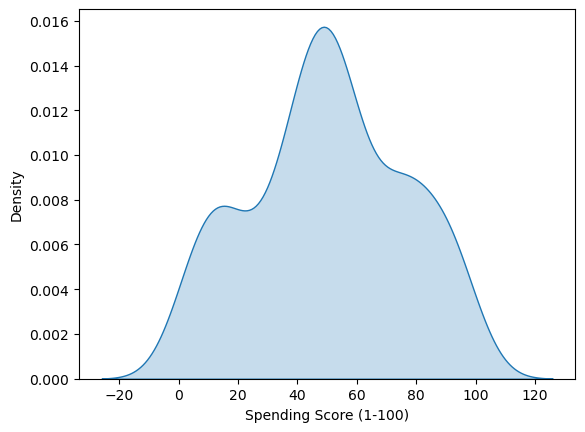

In [10]:
for i in columns:
    plt.figure()
    sns.kdeplot(df[i], shade = True)

In [11]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

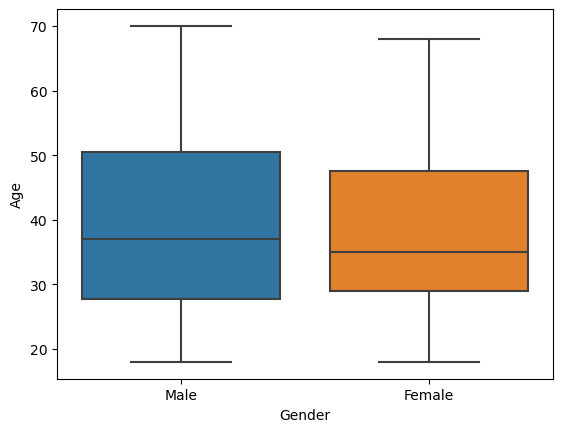

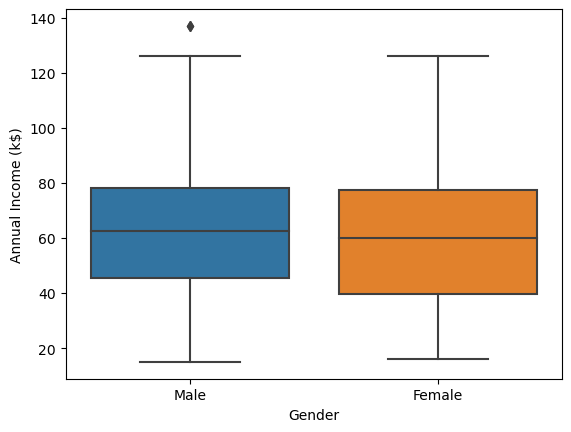

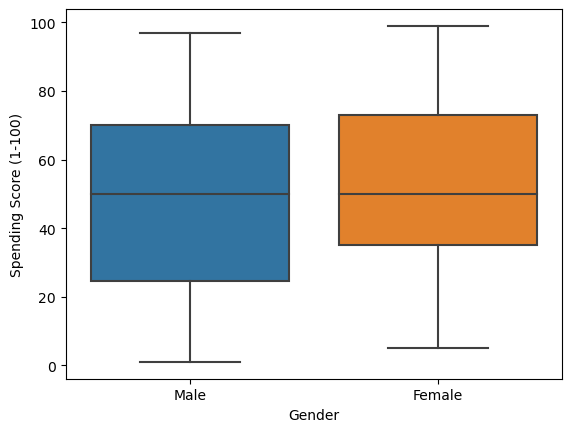

In [12]:
for i in columns:
    plt.figure()
    sns.boxplot(data = df, x = df["Gender"], y = df[i])

In [13]:
df['Gender'].value_counts(normalize = True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

### Bivariant Analysis

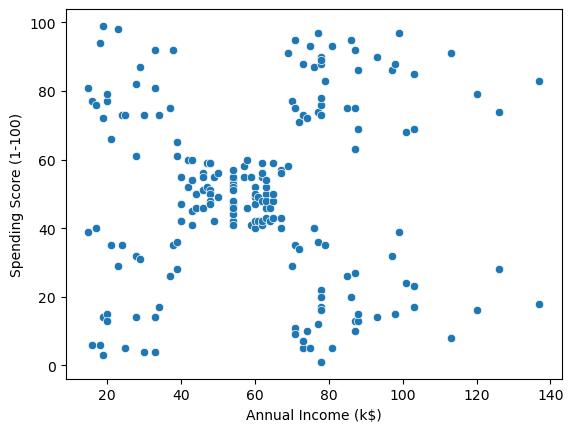

In [14]:
sns.scatterplot(data = df, x = "Annual Income (k$)", y = "Spending Score (1-100)");

In [15]:
df =df.drop(columns = "CustomerID")

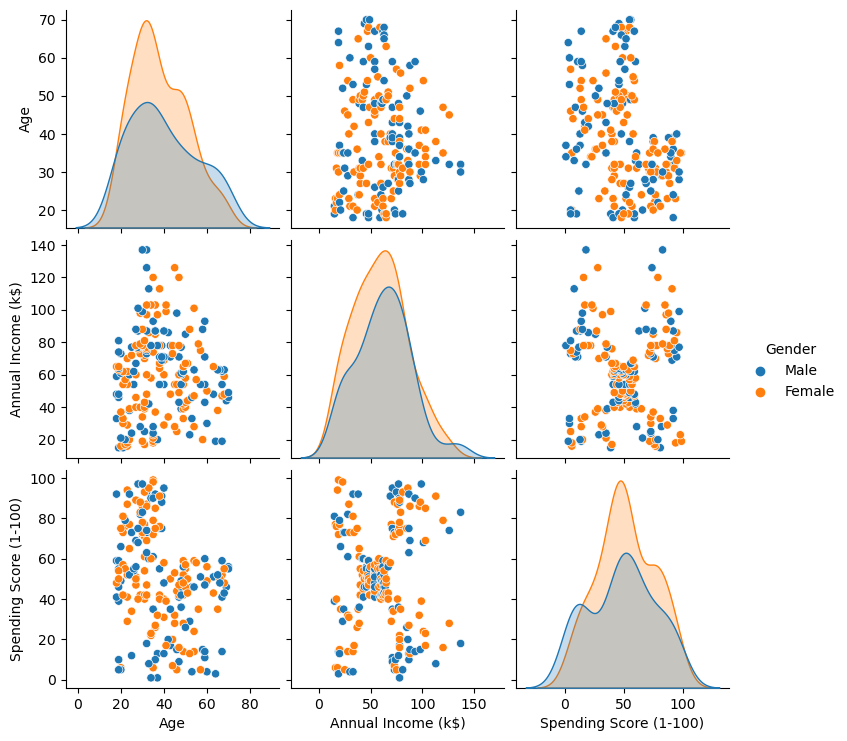

In [16]:
sns.pairplot(df, hue="Gender");

In [17]:
df.groupby("Gender")['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [18]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


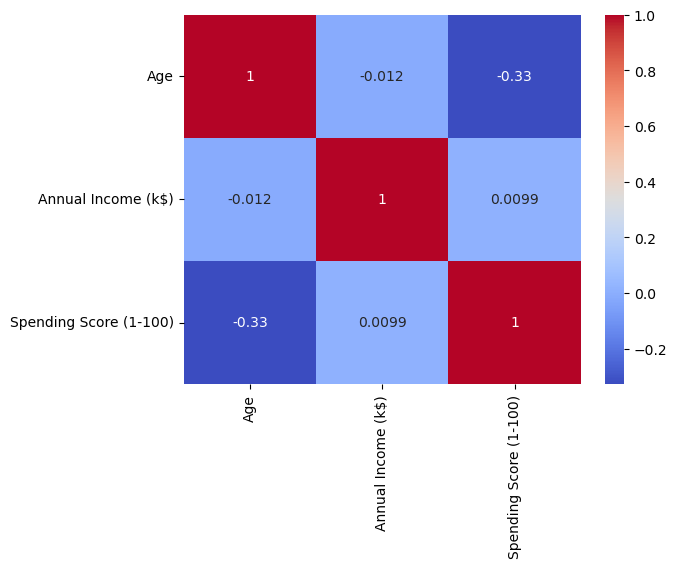

In [19]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm");

### Clustering - Univariate, Bivariate, multivariate

In [20]:
clustering1 = KMeans(n_clusters=3)
clustering1.fit(df[['Annual Income (k$)']])
KMeans(n_clusters=3)

KMeans(n_clusters=3)

In [21]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [22]:
df["income cluster"] = clustering1.labels_

In [23]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [24]:
df["income cluster"].value_counts()

2    90
0    74
1    36
Name: income cluster, dtype: int64

In [25]:
clustering1.inertia_

23517.33093093093

In [26]:
inertia_scores = []

In [27]:
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [28]:
inertia_scores

[137277.28000000006,
 48660.888888888876,
 23528.15217391306,
 13278.112713472483,
 8481.49619047619,
 5050.9047619047615,
 3931.9880952380945,
 2822.4996947496966,
 2303.296428571428,
 1743.4772727272739]

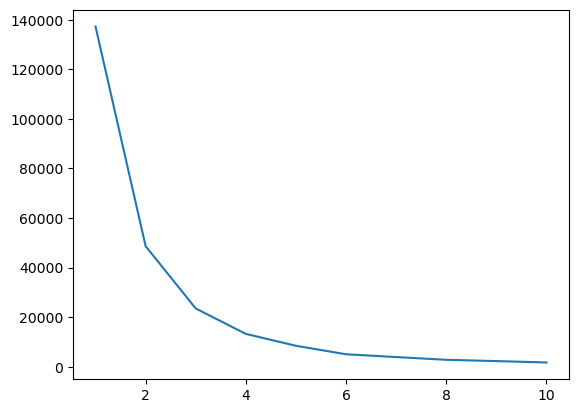

In [29]:
plt.plot(range(1,11), inertia_scores);

In [30]:
df.groupby("income cluster")['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
income cluster,,,
0,39.500000,33.486486,50.229730
1,37.833333,99.888889,50.638889
2,38.722222,67.088889,50.000000


In [31]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'income cluster'],
      dtype='object')

### bivariant analysis

In [32]:
clustering2 = KMeans()
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df["Income and Spending cluster"] = clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster,Income and Spending cluster
0,Male,19,15,39,0,5
1,Male,21,15,81,0,4
2,Female,20,16,6,0,5
3,Female,23,16,77,0,4
4,Female,31,17,40,0,5


In [33]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'income cluster', 'Income and Spending cluster'],
      dtype='object')

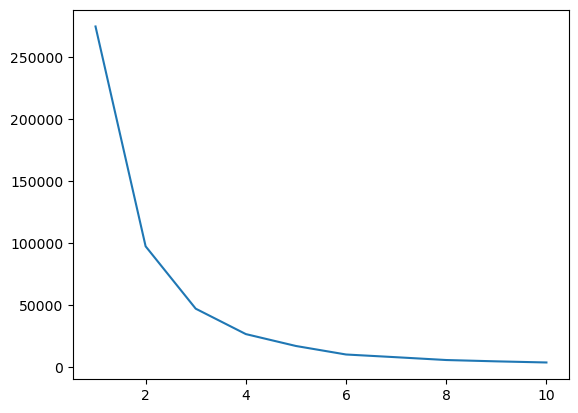

In [36]:
inertia_scores2 = []
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Annual Income (k$)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11), inertia_scores2);    

In [38]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

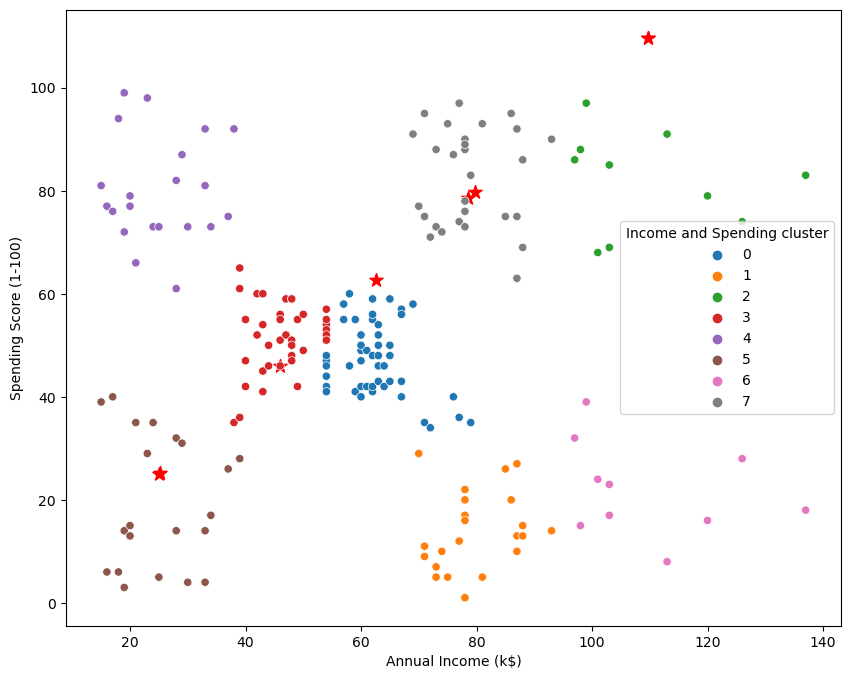

In [39]:
plt.figure(figsize = (10,8))
plt.scatter(x = centers['x'], y = centers['x'], s = 100, c = "red", marker="*")
sns.scatterplot(data = df ,  x = "Annual Income (k$)", y = "Spending Score (1-100)", palette="tab10", hue = "Income and Spending cluster");
plt.savefig('C:/Users/PC/Desktop/Python portfolio project/clustering_bivariant.png')

In [40]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'income cluster', 'Income and Spending cluster'],
      dtype='object')

In [41]:
pd.crosstab(df['Income and Spending cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Income and Spending cluster,,
0,0.583333,0.416667
1,0.347826,0.652174
2,0.600000,0.400000
3,0.605263,0.394737
4,0.571429,0.428571
5,0.619048,0.380952
6,0.700000,0.300000
7,0.517241,0.482759


In [42]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'income cluster', 'Income and Spending cluster'],
      dtype='object')

In [43]:
df.groupby("Income and Spending cluster")['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income and Spending cluster,,,
0,42.229167,62.583333,47.291667
1,40.217391,79.739130,13.391304
2,32.200000,109.700000,82.000000
3,44.052632,45.973684,51.263158
4,25.333333,25.095238,80.047619
5,44.142857,25.142857,19.523810
6,41.000000,109.700000,22.000000
7,32.862069,78.551724,82.172414


### multivariant cluster

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scale = StandardScaler()

In [46]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster,Income and Spending cluster
0,Male,19,15,39,0,5
1,Male,21,15,81,0,4
2,Female,20,16,6,0,5
3,Female,23,16,77,0,4
4,Female,31,17,40,0,5


In [47]:
dff = pd.get_dummies(df, drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),income cluster,Income and Spending cluster,Gender_Male
0,19,15,39,0,5,1
1,21,15,81,0,4,1
2,20,16,6,0,5,0
3,23,16,77,0,4,0
4,31,17,40,0,5,0


In [49]:
dff = scale.fit_transform(dff)

In [48]:
dff = pd.DataFrame(scale.fit_transform(dff))

dff.head()

,0,1,2,3,4,5
0,-1.424569,-1.738999,-0.434801,-1.197342,0.800599,1.128152
1,-1.281035,-1.738999,1.195704,-1.197342,0.391086,1.128152
2,-1.352802,-1.700830,-1.715913,-1.197342,0.800599,-0.886405
3,-1.137502,-1.700830,1.040418,-1.197342,0.391086,-0.886405
4,-0.563369,-1.662660,-0.395980,-1.197342,0.800599,-0.886405


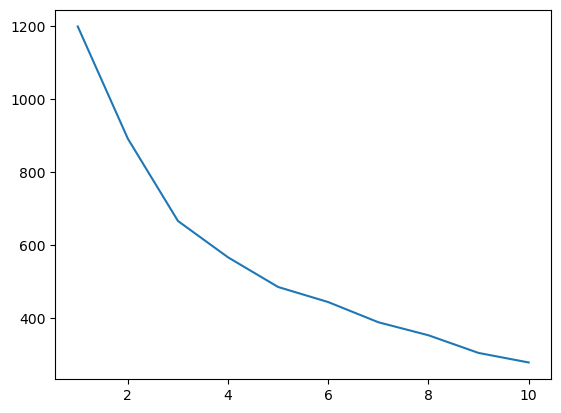

In [53]:
inertia_scores3 = []
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11), inertia_scores3);    

In [51]:
df.to_excel("C:/Users/PC/Desktop/Python portfolio project/Clustering.xlsx", index=False)